# Cluster size
In this notebook, we will see how we can find out the size of different clusters at different single time point.

To do so, we will use a function called `get_clusters_size_tp()`. This function will take the Morpheus log file as pd.df, the field of interest that contains the clusters data, a list of cell types that are member of the cluster, the time point where we want count the number of clusters, and the time symbol, as specified in the Morpheus model. The output will be a dictionary that contains the index and the member of each cluster.

Let try to use the function now, but before we start, let's define some required parameters. First, let's create a simple logger file in a CSV format:

In [1]:
import csv
import tempfile
import os

full_path=os.path.join(tempfile.gettempdir(), "logger.csv")

csvfile=open(full_path,'w', newline='')
obj=csv.writer(csvfile, delimiter='\t')
obj.writerow(['t', 'cell.id', 'RNA_concentration', 'infection'])
obj.writerow(['0', '1', '0.1' ,'1'])
obj.writerow(['0', '2', '0.2' ,'0'])
obj.writerow(['0', '3', '0.3' ,'1'])
obj.writerow(['0', '4', '0.4' ,'1'])
obj.writerow(['0', '5', '0.5' ,'1'])
obj.writerow(['0', '6', '0.6' ,'0'])
obj.writerow(['0', '7', '0.7' ,'0'])
obj.writerow(['0', '8', '0.8' ,'0'])
obj.writerow(['0', '9', '0.9' ,'0'])
obj.writerow(['0', '10', '0.9' ,'0'])
obj.writerow(['0', '11', '0.9' ,'1'])
obj.writerow(['0', '12', '0.9' ,'1'])
obj.writerow(['0', '13', '0.9' ,'1'])
obj.writerow(['0', '14', '0.9' ,'0'])
obj.writerow(['0', '15', '0.9' ,'0'])
obj.writerow(['0', '16', '0.9' ,'0'])
obj.writerow(['0', '17', '0.9' ,'0'])
obj.writerow(['0', '18', '0.9' ,'0'])
obj.writerow(['0', '19', '0.9' ,'1'])

csvfile.close()

The data above describe a hexagonal grid with two types of cell, infected or not infected. The infected cell will have `infection` value = 1.

the hexagonal grid we look like this:

               / \     / \     / \
             /     \ /     \ /     \
            | inf=0 | inf=0 | inf=1 |
            |c-id=17|c-id=18|c-id=19|
           / \     / \     / \     / \
         /     \ /     \ /     \ /     \
        | inf=1 | inf=0 | inf=0 | inf=0 |
        |c-id=13|c-id=14|c-id=15|c-id=16|
       / \     / \     / \     / \     / \
     /     \ /     \ /     \ /     \ /     \
    | inf=0 | inf=0 | inf=0 | inf=1 | inf=1 |
    |c-id=8 |c-id=9 |c-id=10|c-id=11|c-id=12|
     \     / \     / \     / \     / \     /
       \ /     \ /     \ /     \ /     \ /  
        | inf=1 | inf=1 | inf=0 | inf=0 |
        |c-id=4 |c-id=5 |c-id=6 |c-id=7 |
         \     / \     / \     / \     /
           \ /     \ /     \ /     \ /
            | inf=1 | inf=0 | inf=1 | 
            |c-id=1 |c-id=2 |c-id=3 |
             \     / \     / \     /
               \ /     \ /     \ /
           
where inf represents the infection and c-id represent the cell ID.

So, let's define the required parameters and run the function. The field of interest will be `infection`:

In [2]:
field_of_interest='infection'

We also need to define the list of cell types that are members of the cluster formation. In this simple example, we consider a cell to be infected only if it has a value of 1.

In [3]:
cluster_cell_types=[1]

Finally, we will specify the `time_point` and the `time_symbol`, both as specified in the Morpheus model.

In [4]:
time_point=0
t_symbol='t'

After defining all the required parameter, let's run the function. But before that, let's import the function's library. Don't forget to install the package first.

In [6]:
import fitmulticell.sumstat.hexagonal_cluster_sumstat as css

We also need to import `util` library form fitmulticell to read the CSV file as pandas df

In [16]:
import fitmulticell.util as util

No, we will read the CSV file using the `tsv_to_df` function form the fitmulticell package

In [17]:
logger_file = util.tsv_to_df("/tmp")

Let's see how the logger_file loks like

In [18]:
logger_file

t  cell.id  RNA_concentration  infection
0   0        1                0.1          1
1   0        2                0.2          0
2   0        3                0.3          1
3   0        4                0.4          1
4   0        5                0.5          1
5   0        6                0.6          0
6   0        7                0.7          0
7   0        8                0.8          0
8   0        9                0.9          0
9   0       10                0.9          0
10  0       11                0.9          1
11  0       12                0.9          1
12  0       13                0.9          1
13  0       14                0.9          0
14  0       15                0.9          0
15  0       16                0.9          0
16  0       17                0.9          0
17  0       18                0.9          0
18  0       19                0.9          1

In [19]:
cluster_size_result=css.get_clusters_sizes_tp(logger_file, field_of_interest,cluster_cell_types,time_point,time_symbol=t_symbol)
print(f'The size of clusters in the specific time point = {time_point} is = {cluster_size_result}')

The size of clusters in the specific time point = 0 is = {1: 3, 3: 1, 11: 2, 13: 1, 19: 1}


As the result shows, the dictionary key specifies the smallest cell ID in the cluster to act as an index for the cluster, and the value (a list data structure) specify the cell ID for the member cells.

We can plot this result using a function called `plot_cluster_size_all_time_point()`. This function take the ouput of the `get_clusters_size_tp()` as input. 

But before using the function, let's import its library:

In [14]:
import fitMultiCellSumStat.plot_sumstat as pss

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


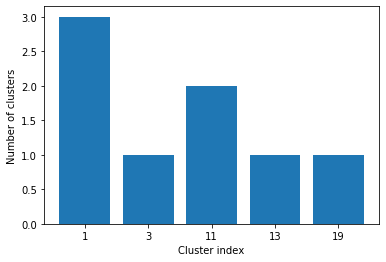

In [20]:
ax = pss.plot_cluster_size_all_time_point(cluster_size_result)